<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 5. Продвинутые методы классификации и регрессии

## Часть 1. Библиотека Xgboost

[Введение](https://xgboost.readthedocs.io/en/latest/model.html) в бустинг деревьев решений. [Параметры](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md) Xgboost.

In [1]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_iris, load_digits, load_boston

**Пример классификации на данных Iris**

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
kf = KFold(y.shape[0], n_folds=5, shuffle=True, random_state=13)
for train_index, test_index in kf:
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
[[9 0 0]
 [0 9 1]
 [0 2 9]]
[[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


**Пример восстановления регрессии на данных boston**

In [3]:
boston = load_boston()
y = boston['target']
X = boston['data']
kf = KFold(y.shape[0], n_folds=5, shuffle=True, random_state=17)
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

8.09713971121
8.92640829762
18.2997739166
6.73819019067
8.47392738812


**Простой пример подбора параметров с GridSearchCV.**

In [4]:
X = boston['data']
y = boston['target']

xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.598487920717
{'n_estimators': 100, 'max_depth': 4}


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished


**Пример использования pickle для сохранения обученных моделей**

In [5]:
# must open in binary format to pickle
pickle.dump(clf, open("../../output/best_boston.pkl", "wb"))
clf2 = pickle.load(open("../../output/best_boston.pkl", "rb"))
print(np.allclose(clf.predict(X), clf2.predict(X)))

True


**Ранняя остановка**

In [6]:
digits = load_digits()

X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="merror",
        eval_set=[(X_test, y_test)])

Will train until validation_0 error hasn't decreased in 10 rounds.
[0]	validation_0-merror:0.168889
[1]	validation_0-merror:0.162222
[2]	validation_0-merror:0.151111
[3]	validation_0-merror:0.142222
[4]	validation_0-merror:0.131111
[5]	validation_0-merror:0.128889
[6]	validation_0-merror:0.124444
[7]	validation_0-merror:0.111111
[8]	validation_0-merror:0.113333
[9]	validation_0-merror:0.111111
[10]	validation_0-merror:0.111111
[11]	validation_0-merror:0.111111
[12]	validation_0-merror:0.106667
[13]	validation_0-merror:0.113333
[14]	validation_0-merror:0.108889
[15]	validation_0-merror:0.104444
[16]	validation_0-merror:0.102222
[17]	validation_0-merror:0.102222
[18]	validation_0-merror:0.102222
[19]	validation_0-merror:0.104444
[20]	validation_0-merror:0.104444
[21]	validation_0-merror:0.100000
[22]	validation_0-merror:0.093333
[23]	validation_0-merror:0.086667
[24]	validation_0-merror:0.086667
[25]	validation_0-merror:0.084444
[26]	validation_0-merror:0.088889
[27]	validation_0-merror:

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

## Xgboost в соревновании Kaggle Forest Cover Type Prediction

[Соревнование](https://www.kaggle.com/c/forest-cover-type-prediction). 
Задача учебная. Предлагается предсказывать тип лесного покрытия на участках 30х30 метров Национального заповедника Рузвельта в Колорадо.

Признаки (подробней на [странице](https://www.kaggle.com/c/forest-cover-type-prediction/data) соревнования):

- Elevation (высота) - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope (наклон) - Slope in degrees
- Horizontal_Distance_To_Hydrology (горизонтальное расстояние до воды) - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology (вертикальное расстояние до воды) - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways (горизонтальное расстояние до дорог) - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice 
- Horizontal_Distance_To_Fire_Points (горизонтальное расстояние до центров воспламенения) - Horz Dist to nearest wildfire ignition points 
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (тип почвы) - (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**Подключаем библиотеки и загружаем данные. Используем [log_progress](https://github.com/alexanderkuk/log-progress) для отслеживания итераций в циклах.**

In [41]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import xgboost as xgb
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.grid_search import GridSearchCV
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../scripts/')
from log_progress import log_progress
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [68]:
train_df = pd.read_csv('../../data/forest_train.csv')
test_df = pd.read_csv('../../data/forest_test.csv')

In [34]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Cover_Type', index_label="Id", init_index=15121):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(init_index, 
                                                  predicted_labels.shape[0] + init_index),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

**Создаем признаки.**

In [69]:
train_df['Under_water'] = train_df.Vertical_Distance_To_Hydrology < 0
test_df['Under_water'] = test_df.Vertical_Distance_To_Hydrology < 0

In [70]:
train_df['EVDtH'] = train_df.Elevation - train_df.Vertical_Distance_To_Hydrology
test_df['EVDtH'] = test_df.Elevation - test_df.Vertical_Distance_To_Hydrology

train_df['EHDtH'] = train_df.Elevation - train_df.Horizontal_Distance_To_Hydrology*0.2
test_df['EHDtH'] = test_df.Elevation - test_df.Horizontal_Distance_To_Hydrology*0.2

In [71]:
train_df['Distanse_to_Hydrolody'] = (train_df['Horizontal_Distance_To_Hydrology'] ** 2 + 
                                  train_df['Vertical_Distance_To_Hydrology']**2) ** 0.5
test_df['Distanse_to_Hydrolody'] = (test_df['Horizontal_Distance_To_Hydrology']**2 + 
                                 test_df['Vertical_Distance_To_Hydrology']**2) ** 0.5

train_df['Hydro_Fire_1'] = train_df['Horizontal_Distance_To_Hydrology'] + \
    train_df['Horizontal_Distance_To_Fire_Points']
test_df['Hydro_Fire_1'] = test_df['Horizontal_Distance_To_Hydrology'] + \
    test_df['Horizontal_Distance_To_Fire_Points']

train_df['Hydro_Fire_2'] = abs(train_df['Horizontal_Distance_To_Hydrology'] - \
                                train_df['Horizontal_Distance_To_Fire_Points'])
test_df['Hydro_Fire_2'] = abs(test_df['Horizontal_Distance_To_Hydrology'] - \
                           test_df['Horizontal_Distance_To_Fire_Points'])

train_df['Hydro_Road_1'] = abs(train_df['Horizontal_Distance_To_Hydrology'] + \
                            train_df['Horizontal_Distance_To_Roadways'])
test_df['Hydro_Road_1'] = abs(test_df['Horizontal_Distance_To_Hydrology'] + \
                           test_df['Horizontal_Distance_To_Roadways'])

train_df['Hydro_Road_2'] = abs(train_df['Horizontal_Distance_To_Hydrology'] - \
                            train_df['Horizontal_Distance_To_Roadways'])
test_df['Hydro_Road_2'] = abs(test_df['Horizontal_Distance_To_Hydrology'] - \
                           test_df['Horizontal_Distance_To_Roadways'])

train_df['Fire_Road_1'] = abs(train_df['Horizontal_Distance_To_Fire_Points'] + \
                           train_df['Horizontal_Distance_To_Roadways'])
test_df['Fire_Road_1'] = abs(test_df['Horizontal_Distance_To_Fire_Points'] + \
                          test_df['Horizontal_Distance_To_Roadways'])

train_df['Fire_Road_2'] = abs(train_df['Horizontal_Distance_To_Fire_Points'] - \
                           train_df['Horizontal_Distance_To_Roadways'])
test_df['Fire_Road_2'] = abs(test_df['Horizontal_Distance_To_Fire_Points'] - \
                          test_df['Horizontal_Distance_To_Roadways'])

In [72]:
y = train_df['Cover_Type']
train_df = train_df.drop(['Cover_Type', 'Id'], axis=1)
test_df = test_df.drop(['Id'], axis=1)

In [73]:
y = y - 1 # Чтоб классы нумеровались от о до 6

In [103]:
def score(params):
    from sklearn.metrics import log_loss
    print("Training with params:")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid).reshape((X_test.shape[0], 7))
    score = log_loss(y_test, predictions)
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [104]:
def optimize(trials):
    space = {
             'n_estimators' : 150,
             'eta' : hp.quniform('eta', 0.025, 0.5, 0.025),
             'max_depth' : hp.quniform('max_depth', 4, 10, 2),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.25),
             'gamma' : 0,
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.25),
             'num_class' : 7,
             'eval_metric': 'merror',
             'objective': 'multi:softprob',
             'nthread' : 4,
             'silent' : 1
             }
    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=50)

    print(best)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y, test_size=0.2, random_state=1234)

In [105]:
trials = Trials()
optimize(trials)

Training with params:
{'colsample_bytree': 0.75, 'silent': 1, 'eval_metric': 'merror', 'nthread': 4, 'min_child_weight': 4.0, 'n_estimators': 150, 'subsample': 0.75, 'eta': 0.17500000000000002, 'objective': 'multi:softprob', 'num_class': 7, 'max_depth': 8.0, 'gamma': 0}
	Score 0.309290498852


Training with params:
{'colsample_bytree': 1.0, 'silent': 1, 'eval_metric': 'merror', 'nthread': 4, 'min_child_weight': 4.0, 'n_estimators': 150, 'subsample': 0.75, 'eta': 0.07500000000000001, 'objective': 'multi:softprob', 'num_class': 7, 'max_depth': 8.0, 'gamma': 0}
	Score 0.330795197248


Training with params:
{'colsample_bytree': 0.75, 'silent': 1, 'eval_metric': 'merror', 'nthread': 4, 'min_child_weight': 3.0, 'n_estimators': 150, 'subsample': 1.0, 'eta': 0.375, 'objective': 'multi:softprob', 'num_class': 7, 'max_depth': 8.0, 'gamma': 0}
	Score 0.329478720171


Training with params:
{'colsample_bytree': 0.5, 'silent': 1, 'eval_metric': 'merror', 'nthread': 4, 'min_child_weight': 3.0, 'n_est

KeyboardInterrupt: 

In [106]:
param = {'colsample_bytree': 0.75, 'silent': 1, 'eval_metric': 'merror', 'nthread': 4, 
         'min_child_weight': 4.0, 'n_estimators': 150, 'subsample': 0.75, 'eta': 0.175, 
         'objective': 'multi:softprob', 
         'num_class': 7, 'max_depth': 8.0, 'gamma': 0}

In [107]:
dtrain = xgb.DMatrix(train_df, y)

In [131]:
xgbCvResult = xgb.cv(param, dtrain, 
                      num_boost_round=250,  
                      nfold=5, show_progress=True)

[0]	cv-test-merror:0.2511904+0.00536317893045	cv-train-merror:0.2076386+0.00657189837414
[1]	cv-test-merror:0.2223544+0.00260033733196	cv-train-merror:0.1808864+0.00425582887814
[2]	cv-test-merror:0.2090608+0.00388133015344	cv-train-merror:0.1671958+0.0033780387446
[3]	cv-test-merror:0.2019842+0.005935535777	cv-train-merror:0.158912+0.00246959551344
[4]	cv-test-merror:0.1979498+0.0037505977337	cv-train-merror:0.1518354+0.00286344104881
[5]	cv-test-merror:0.1923942+0.00411677647681	cv-train-merror:0.145982+0.00289680706986
[6]	cv-test-merror:0.19041+0.00488433487795	cv-train-merror:0.142328+0.00268197583882
[7]	cv-test-merror:0.189418+0.00435922071017	cv-train-merror:0.1388558+0.00304616364629
[8]	cv-test-merror:0.1862434+0.00543969284427	cv-train-merror:0.1342262+0.00239737334598
[9]	cv-test-merror:0.1837966+0.00483486597953	cv-train-merror:0.1302578+0.00253596193978
[10]	cv-test-merror:0.181746+0.00307797725788	cv-train-merror:0.1261904+0.00265739711748
[11]	cv-test-merror:0.1796298+0

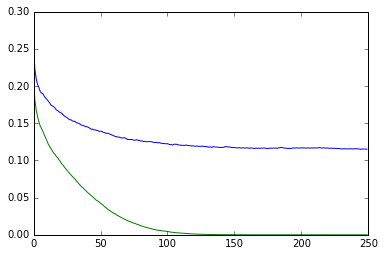

In [132]:
plot(range(xgbCvResult.shape[0]), xgbCvResult['test-merror-mean'])
plot(range(xgbCvResult.shape[0]), xgbCvResult['train-merror-mean'])

In [133]:
best_num_round = np.argmin(xgbCvResult['test-merror-mean'])

**Сделаем прогноз для всей тестовой выборки.**

In [140]:
bestXgb = xgb.train(param, dtrain, 750)

In [141]:
dtest = xgb.DMatrix(test_df)

In [142]:
xgboost_predict_proba = bestXgb.predict(dtest)

In [143]:
xgboost_prediction = np.argmax(xgboost_predict_proba,
                                         axis=1)

**Важный шаг: мы вычитали из целевых меток 1, теперь добавляем.**

In [144]:
xgboost_prediction += 1

In [145]:
write_to_submission_file(xgboost_prediction, 
                         '../../output/forest_cover_type_xgboost.csv')

**У такой посылки на Kaggle результат - 0.77842.**